In [1]:
import numpy as np
import pandas as pd
import cmath

In [2]:
%matplotlib widget
import matplotlib.pyplot as plt

### Импорт данных

In [3]:
list_of_angles_TE = [-20, -18, -16, -15, -12, -10, -8, -6, -5, -2, 0, 2, 4, 5, 6, 7, 10, 12, 14, 15, 16, 18, 20, 22, 24,
                     25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 39, 40, 42, 44, 45, 47, 48, 49, 50, 51, 52, 54, 55,
                     57, 58, 59, 60]

list_of_angles_TM = [-20, -18, -16, -15, -12, -10, -8, -6, -5, -2, 0, 2, 4, 5, 6, 7, 10, 12, 14, 15, 16, 18, 20, 22, 24,
                     26, 28, 30, 32, 34, 36, 37, 39, 40, 42, 44, 47, 48, 50, 51, 54, 57, 60]

Файлы с TE-поляризацией

In [4]:
first_app = True
for angle in list_of_angles_TE:
    if np.abs(angle) < 10:
        if angle < 0:
            file = '-0' + str(np.abs(angle)) + 'deg.s1p'
        else:
            file = '0' + str(angle) + 'deg.s1p'
    else:
        file = str(angle) + 'deg.s1p'

    temp_8A = pd.read_csv('C:\\Users\\isvoropaev\\Desktop\\python_codes\\post_processing_RIS\\2oct\\inc_theta_-15deg_scan30_TE\\' + file,
                          sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                          names=['Frequency', 'ReS12', 'ImS12'])

    temp_8A['Angle'] = angle
    if first_app:
        data_8A_TE = temp_8A.loc[temp_8A['Frequency'] == 25.0*1e9]
        first_app = False
    else:
        data_8A_TE = pd.concat([data_8A_TE, temp_8A.loc[temp_8A['Frequency'] == 25.0*1e9]], ignore_index=True)

Файлы с TM-поляризацией

In [5]:
first_app = True
for angle in list_of_angles_TM:
    if np.abs(angle) < 10:
        if angle < 0:
            file = '-0' + str(np.abs(angle)) + 'deg.s1p'
        else:
            file = '0' + str(angle) + 'deg.s1p'
    else:
        file = str(angle) + 'deg.s1p'

    temp_8A = pd.read_csv('C:\\Users\\isvoropaev\\Desktop\\python_codes\\post_processing_RIS\\2oct\\inc_theta_-15deg_scan30_TM\\' + file,
                          sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                          names=['Frequency', 'ReS12', 'ImS12'])

    temp_8A['Angle'] = angle
    if first_app:
        data_8A_TM = temp_8A.loc[temp_8A['Frequency'] == 25.0*1e9]
        first_app = False
    else:
        data_8A_TM = pd.concat([data_8A_TM, temp_8A.loc[temp_8A['Frequency'] == 25.0*1e9]], ignore_index=True)

In [7]:
data_8A_TE

,Frequency,ReS12,ImS12,Angle
0,2.500000e+10,-0.000452,-0.000766,-20
1,2.500000e+10,-0.003663,0.000679,-18
2,2.500000e+10,-0.003548,0.000736,-16
3,2.500000e+10,-0.003658,0.000814,-15
4,2.500000e+10,-0.005659,-0.003110,-12
5,2.500000e+10,-0.005629,-0.002953,-10
6,2.500000e+10,-0.005309,0.004966,-8
7,2.500000e+10,-0.005254,0.004941,-6
8,2.500000e+10,-0.005273,0.004909,-5
9,2.500000e+10,-0.002836,0.010570,-2


Очистка памяти от ненужных переменных

In [8]:
del first_app
del temp_8A
del list_of_angles_TE
del list_of_angles_TM
del angle
del file

In [9]:
data_8A_TE['s12']=data_8A_TE['ReS12']+1j*data_8A_TE['ImS12']
data_8A_TM['s12']=data_8A_TM['ReS12']+1j*data_8A_TM['ImS12']

In [10]:
data_8A_TE = data_8A_TE.drop(['ReS12', 'ImS12'], axis=1)
data_8A_TM = data_8A_TM.drop(['ReS12', 'ImS12'], axis=1)

Нормировка

In [11]:
# max_TE = np.max(np.abs(data_8A_TE['s12']))
# max_TM = np.max(np.abs(data_8A_TM['s12']))

# data_8A_TE['s12_norm']=data_8A_TE['s12']/max_TE
# data_8A_TM['s12_norm']=data_8A_TM['s12']/max_TM

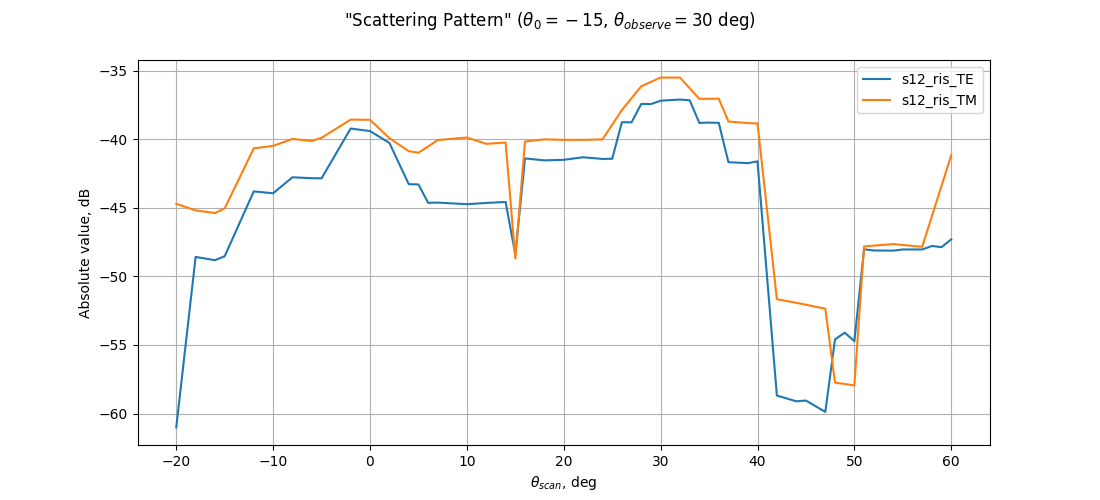

In [12]:
fig1 = plt.figure(figsize=(11,5))

ax_1 = fig1.add_subplot(111)
ax_1.plot(data_8A_TE['Angle'], 20*np.log10(data_8A_TE['s12'].apply(abs)), label='s12_ris_TE')
ax_1.plot(data_8A_TM['Angle'], 20*np.log10(data_8A_TM['s12'].apply(abs)), label='s12_ris_TM')
ax_1.set_xlabel(r'$\theta_{scan}$, deg')
ax_1.set_ylabel('Absolute value, dB')
ax_1.legend()
ax_1.grid()


fig1.suptitle(r'"Scattering Pattern" ($\theta_0=-15$, $\theta_{observe}=30$ deg)')
plt.show()

In [13]:
data_free_TE = pd.read_csv('C:\\Users\\isvoropaev\\Desktop\\python_codes\\post_processing_RIS\\2oct\\inc_theta_-15deg_scan30_TE\\free.s1p',
                          sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                          names=['Frequency', 'ReS12', 'ImS12'])
data_free_TM = pd.read_csv('C:\\Users\\isvoropaev\\Desktop\\python_codes\\post_processing_RIS\\2oct\\inc_theta_-15deg_scan30_TM\\free.s1p',
                          sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                          names=['Frequency', 'ReS12', 'ImS12'])
data_screen_TE = pd.read_csv('C:\\Users\\isvoropaev\\Desktop\\python_codes\\post_processing_RIS\\2oct\\inc_theta_-15deg_scan30_TE\\screen.s1p',
                          sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                          names=['Frequency', 'ReS12', 'ImS12'])
data_screen_TM = pd.read_csv('C:\\Users\\isvoropaev\\Desktop\\python_codes\\post_processing_RIS\\2oct\\inc_theta_-15deg_scan30_TM\\screen.s1p',
                          sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                          names=['Frequency', 'ReS12', 'ImS12'])

In [14]:
data_free_TE = data_free_TE.loc[data_free_TE['Frequency'] == 25.0*1e9]
data_free_TM = data_free_TM.loc[data_free_TM['Frequency'] == 25.0*1e9]
data_screen_TE = data_screen_TE.loc[data_screen_TE['Frequency'] == 25.0*1e9]
data_screen_TM = data_screen_TM.loc[data_screen_TM['Frequency'] == 25.0*1e9]

In [15]:
data_free_TE['s12']=data_free_TE['ReS12']+1j*data_free_TE['ImS12']
data_free_TM['s12']=data_free_TM['ReS12']+1j*data_free_TM['ImS12']
data_screen_TE['s12']=data_screen_TE['ReS12']+1j*data_screen_TE['ImS12']
data_screen_TM['s12']=data_screen_TM['ReS12']+1j*data_screen_TM['ImS12']

In [16]:
data_free_TE = data_free_TE.drop(['ReS12', 'ImS12'], axis=1)
data_free_TM = data_free_TM.drop(['ReS12', 'ImS12'], axis=1)
data_screen_TE = data_screen_TE.drop(['ReS12', 'ImS12'], axis=1)
data_screen_TM = data_screen_TM.drop(['ReS12', 'ImS12'], axis=1)

In [32]:
s12_free_TE = data_free_TE.loc[2500,'s12']
s12_free_TM = data_free_TM.loc[2500,'s12']
s12_screen_TE = data_screen_TE.loc[2500,'s12']
s12_screen_TM = data_screen_TM.loc[2500,'s12']

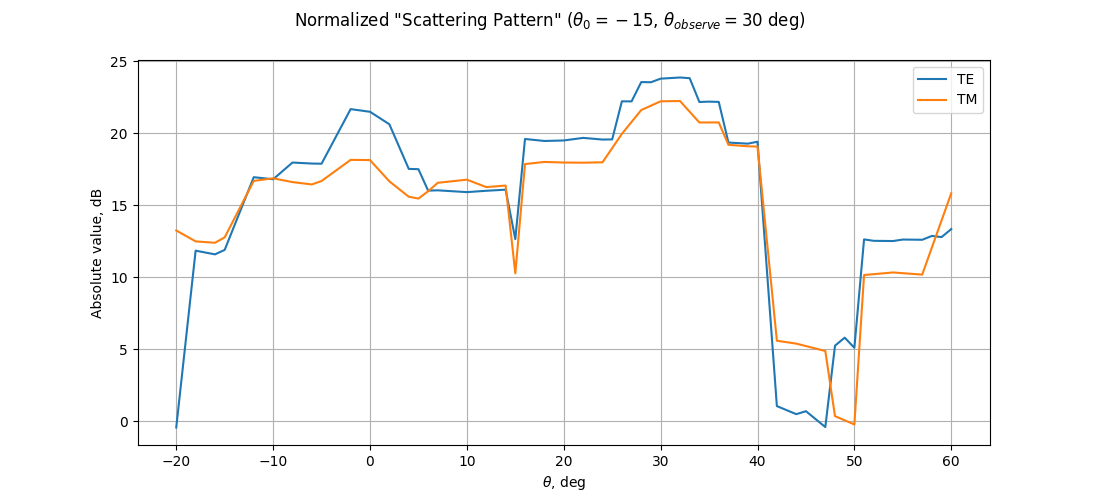

In [34]:
fig2 = plt.figure(figsize=(11,5))

ax_1 = fig2.add_subplot(111)
ax_1.plot(data_8A_TE['Angle'], 20*np.log10(((data_8A_TE['s12'] - s12_free_TE) /
                                            (s12_free_TE - s12_screen_TE)).apply(abs)), label='TE')
ax_1.plot(data_8A_TM['Angle'], 20*np.log10(((data_8A_TM['s12'] - s12_free_TM) / (s12_free_TM - s12_screen_TM)).apply(abs)), label='TM')
ax_1.set_xlabel(r'$\theta$, deg')
ax_1.set_ylabel('Absolute value, dB')
ax_1.legend()
ax_1.grid()


fig2.suptitle(r'Normalized "Scattering Pattern" ($\theta_0=-15$, $\theta_{observe}=30$ deg)')
plt.show()